<a href="https://colab.research.google.com/github/ahaque12/538-basketball-cities/blob/master/538_Riddler_Express_Sept_11%2C_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 538 Riddler Express
From Zack Beamer comes a baffling brain teaser of basketball, just in time for the NBA playoffs:

Once a week, folks from Blacksburg, Greensboro, and Silver Spring get together for a game of pickup basketball. Every week, anywhere from one to five individuals will show up from each town, with each outcome equally likely.

Using all the players that show up, they want to create exactly two teams of equal size. Being a prideful bunch, everyone wears a jersey that matches the color mentioned in the name of their city. However, since it might create confusion to have one jersey playing for both sides, they agree that the residents of two towns will combine forces to play against the third town’s residents.

What is the probability that, on any given week, it’s possible to form two equal teams with everyone playing, where two towns are pitted against the third?

Extra credit: Suppose that, instead of anywhere from one to five individuals per town, anywhere from one to N individuals show up per town. Now what’s the probability that there will be two equal teams?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Simulation

One way to solve this is by simulating scenarios.

In [2]:
def generate_sample(n, players=5):
    """ Generate sample of players from each city.
    """
    return np.random.randint(1, players + 1, size=(n, 3))

num_players = generate_sample(3)
num_players

array([[3, 2, 5],
       [3, 3, 2],
       [4, 4, 3]])

In [3]:
def equal_teams(x):
  """ Determine if one team has the same number of players as the 
      other two combined.
  """
  return (x[:, 0] + x[:, 1] == x[:, 2]) | \
         (x[:, 0] + x[:, 2] == x[:, 1]) | \
         (x[:, 1] + x[:, 2] == x[:, 0])

equal_teams(np.array([[2, 2, 4], 
                      [1, 3, 5]]))

array([ True, False])

In [4]:
n = 1000000
x = equal_teams(generate_sample(n, players=5))
x.mean(), x.std() / np.sqrt(x.shape[0])

(0.240146, 0.00042717197787776293)

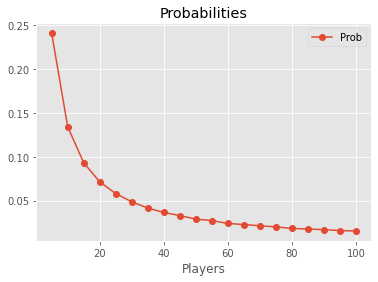

In [5]:
prob = []
players = np.arange(5, 101, 5)
simulations = 100000

for n in players:
    x = equal_teams(generate_sample(simulations, players=n))
    prob.append(x.mean())

pd.DataFrame({"Prob": prob, "Players": players}).plot(kind="line", x="Players", marker="o", title="Probabilities");

In [6]:
coef = np.polyfit(players, prob, deg=2)
coef

array([ 3.67458647e-05, -5.22221053e-03,  1.91552263e-01])

We can try fitting a curve to these probabilities.

In [7]:
def gen_matrix(coef):
  X = []
  m = len(coef)

  for i in range(m):
      X.append(players**(m - i - 1))

  X = np.array(X).T
  return X

X = gen_matrix(coef)

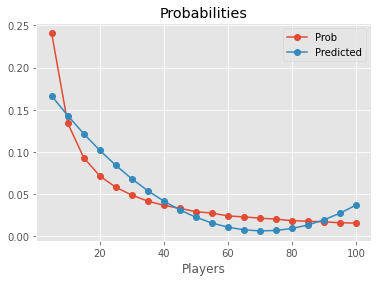

In [8]:
def predict(X, coef):
    return X.dot(coef.reshape((-1, 1)))

def smooth(x, y, degree=2):
    coef = np.polyfit(x, y, deg=degree)
    X = gen_matrix(coef)

    return predict(X, coef).ravel()

pd.DataFrame({"Prob": prob, 
              "Players": players, 
              "Predicted": smooth(players, prob, degree=2)}).plot(kind="line", 
                                                                  x="Players", 
                                                                  marker="o", 
                                                                  title="Probabilities");

## Analytical solution

Suppose we have three cities. Let $x_i$ indicate the number of players attending from the $i$th city. We know $x_i \in [1, n]$. 

We can solve this using counting. There are $n^3$ permutations of people from each city attending the game. We can look at any city $i$ and look at the probability of the number of players from that city being equal to the combined number of players attending from the other cities. Denote this probability as $A_i$ for the $i$th city.

Because each of these events are distinct (there is no scenario where two teams have the number of players as the remaining two combined), once we find $A_i$ the total probability of having two equal teams is $3*A_i$. 

Let's look at the first city. If the city has $m$ players, there are $m-1$ number of ways the remaining cities can add up to $m$. This is because you have $1 + (m-1)$, $2 + (m-2)$, etc. This is true if that city sends a minimum of 2 players (if that city sends one player the other two cities cannot add up to one), and a maximum of $n$ players. Therefore we are left with the formula:

\begin{align}
A_i &= \frac{\sum_{m=2}^n \sum_{j=1}^{m-1} 1}{n^3} \\
&= \frac{\sum_{m=2}^n m - 1}{n^3} \\
&= \frac{\frac{n(n+1)}{2} - 1 - (n - 1)}{n^3} \\
&= \frac{1}{2}*\frac{n - 1} {n^2}
\end{align}

The total probability of having two equal teams is therefore:
\begin{align}
\frac{3}{2}*\frac{n-1}{n^2}
\end{align}

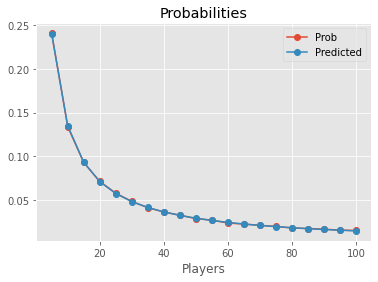

In [9]:
pd.DataFrame({"Prob": prob, 
              "Players": players, 
              "Predicted": 1.5*(players - 1) / (players**2)}).plot(kind="line", 
                                                                  x="Players", 
                                                                  marker="o", 
                                                                  title="Probabilities");